# Gaussian Mixture Model(GMM)

In [2]:
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
from numpy import unique, where
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import numpy as np

from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn import preprocessing 
import plotly.express as px


In [3]:
datasets = {
    "Spherical Clusters": pd.read_csv('./Datasets/Speherical_Clusters.csv'),
    "Moon Clusters": pd.read_csv('./Datasets/moons_Clusters.csv'),
    "Nested Clusters": pd.read_csv('./Datasets/Nested_Clusters.csv'),
    #"Hierarchical Structure": pd.read_csv('./Datasets/zoo.csv')
    "Hierarchical Structure": pd.read_csv('./Datasets/Mall_Customers.csv')
    
}
label_encoder = preprocessing.LabelEncoder() 

#encode gender
datasets['Hierarchical Structure']['Gender'] = label_encoder.fit_transform(datasets['Hierarchical Structure']['Gender'])

In [4]:
print("Spherical Clusters Dataset:")
print(datasets["Spherical Clusters"].head())

print("\nMoon Clusters Dataset:")
print(datasets["Moon Clusters"].head())

print("\nNested Clusters Dataset:")
print(datasets["Nested Clusters"].head())

print("\nHierarchical Structure Dataset:")
print(datasets["Hierarchical Structure"].head())

Spherical Clusters Dataset:
   Feature1  Feature2  Cluster
0 -2.004128  7.852632        3
1  0.670479  4.040943        0
2 -2.263678  8.273068        3
3 -2.350730  2.277237        2
4  2.228740  1.145386        1

Moon Clusters Dataset:
   Feature1  Feature2  Cluster
0  2.064430  0.546069        1
1  1.762473 -0.062689        1
2 -0.245490  0.668868        0
3 -0.174630  0.183882        1
4  0.452110 -0.406512        1

Nested Clusters Dataset:
   Feature1  Feature2  Cluster
0 -0.163255 -0.086455        0
1 -0.011146  0.011499        0
2 -2.115056  1.405365        2
3  0.542611  0.715939        1
4  2.320800  0.117091        2

Hierarchical Structure Dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16 

### Extracts truth labels of each dataset

In [5]:
true_labels_spherical = datasets["Spherical Clusters"]['Cluster'].values  
true_labels_moon = datasets["Moon Clusters"]['Cluster'].values  
true_labels_nested = datasets["Nested Clusters"]['Cluster'].values
#truth_labels_hierarchical = datasets["Hierarchical Structure"]['class_type'].values 

### Function to plot clustering result

In [6]:
def plot_gmm_results(X, gmm_result, title):
    gmm_clusters = unique(gmm_result)
    for gmm_cluster in gmm_clusters:
        # Get data points that fall in this cluster
        index = where(gmm_result == gmm_cluster)
        # Make the plot
        plt.scatter(X[index, 0], X[index, 1], label=f'Cluster {gmm_cluster}')
    plt.title(title)
    plt.legend()
    plt.show()

### Function to calculate Rand Index and Sihouette Score

In [7]:
def evaluate_gmm(true_labels, gmm_result, data_scaled):
    rand_index = adjusted_rand_score(true_labels, gmm_result)
    silhouette_avg = silhouette_score(data_scaled, gmm_result)
    
    # Print evaluation metrics
    print(f"Adjusted Rand Index: {rand_index:.4f}")
    print(f"Silhouette Score: {silhouette_avg:.4f}")

### Function to determine the optimal number of clusters using BIC score

In [8]:
def find_best_gmm(data, max_clusters=10, covariance_types=['full', 'tied', 'diag', 'spherical'], reg_covar_values=[1e-4, 1e-3, 1e-2]):
    best_bic = np.inf
    best_gmm = None
    best_params = {}

    n_components_range = range(1, max_clusters + 1)
    
    # Loop over different numbers of clusters and other parameters
    for n_components in n_components_range:
        for covariance_type in covariance_types:
            for reg_covar in reg_covar_values:
                gmm_model = GaussianMixture(
                    n_components=n_components,
                    covariance_type=covariance_type,
                    reg_covar=reg_covar,
                    random_state=0
                )
                gmm_model.fit(data)
                
                # Calculate BIC
                bic = gmm_model.bic(data)
                
                # Update the best model based on BIC
                if bic < best_bic:
                    best_bic = bic
                    best_gmm = gmm_model
                    best_params = {
                        'n_components': n_components,
                        'covariance_type': covariance_type,
                        'reg_covar': reg_covar
                    }
    
    print(f"Best BIC: {best_bic}")
    print(f"Best parameters: {best_params}")
    return best_gmm

## Perform GMM on various clusteres pattern

#### Spherical Clusters

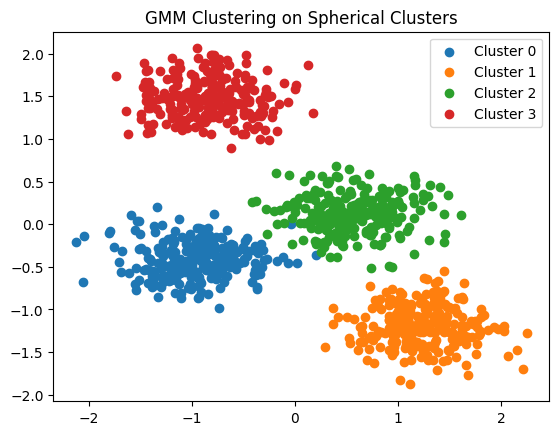

Adjusted Rand Index: 1.0000
Silhouette Score: 0.7252


In [9]:
scaler = StandardScaler()
data = datasets["Spherical Clusters"] 
data = scaler.fit_transform(data)

# Define the GMM model
gmm_model = GaussianMixture(n_components=4, random_state=0)  

# Fit and predict the clusters
gmm_result = gmm_model.fit_predict(data)

# Plot the results
plot_gmm_results(data, gmm_result, title=f"GMM Clustering on Spherical Clusters")
evaluate_gmm(true_labels_spherical, gmm_result, data)

#### GMM on Moon Clusters

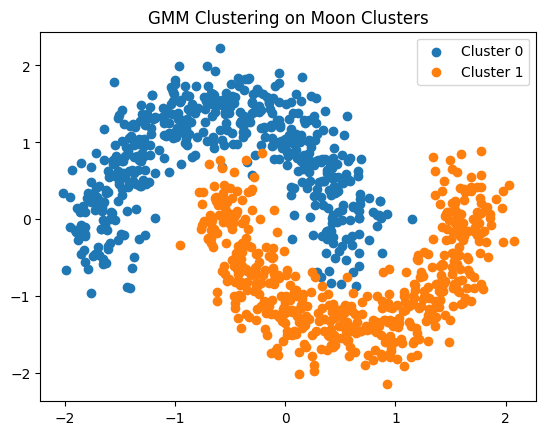

Adjusted Rand Index: 1.0000
Silhouette Score: 0.5577


In [10]:
scaler = StandardScaler()
data = datasets["Moon Clusters"] 
data = scaler.fit_transform(data)

# Define the GMM model
gmm_model = GaussianMixture(n_components=2, random_state=0)  

# Fit and predict the clusters
gmm_result = gmm_model.fit_predict(data)

# Plot the results
plot_gmm_results(data, gmm_result, title=f"GMM Clustering on Moon Clusters")
evaluate_gmm(true_labels_moon, gmm_result, data)    

#### GMM on Nested Clusters

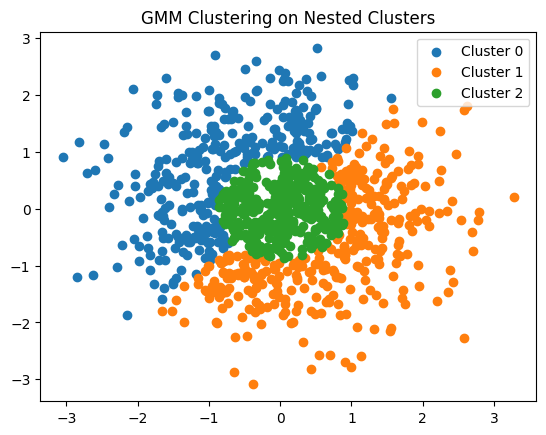

Adjusted Rand Index: 0.5016
Silhouette Score: 0.3486


In [11]:
scaler = StandardScaler()
data = datasets["Nested Clusters"] 
data = scaler.fit_transform(data)

# Define the GMM model
gmm_model = GaussianMixture(n_components=3, random_state=0)  

# Fit and predict the clusters
gmm_result = gmm_model.fit_predict(data)

# Plot the results
plot_gmm_results(data, gmm_result, title=f"GMM Clustering on Nested Clusters")
evaluate_gmm(true_labels_nested, gmm_result, data)

#### GMM on Hierarchical Clusters

In [26]:
# Load the dataset
data = datasets["Hierarchical Structure"]


# Select the feature columns
feature_columns = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[feature_columns])

# Define the GMM model
gmm_model = GaussianMixture(n_components=10, random_state=0)

# Fit and predict the clusters
gmm_result = gmm_model.fit_predict(data_scaled)

# Add GMM result to the original dataset
data['GMM_Cluster'] = gmm_result

# Plot the 3D scatter plot
fig = px.scatter_3d(data, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='GMM_Cluster',
                    title="3D GMM Clustering on Mall Customers Dataset", labels={'GMM_Cluster': 'Cluster'})
fig.update_traces(marker=dict(size=3)) 

fig.show()

In [27]:

# Calculate and print the Silhouette Score
silhouette_avg = silhouette_score(data, gmm_result)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: -0.0272
